<div style="font-family:times new roman"> 
 <h1 style="font-size:t 20px">   1.0  Feature Importance and Selection 
    </h1></div>

<div style=style="font-size: 18px">
<p style="font-family:times new roman">
In the field of data science, data collection is a tedious task. Moreover, once we have the data, we are often faced with the problem of selecting the right set of features for our machine learning model, to solve the problem at hand. For example – Out of tens of thousands of genes, scientists at Computational Research and Life Sciences/Genomics Division at UC Berkley claimed that just about 50 gene expressions are sufficient to predict the chances of the disease. So the question is – How to select those top 50 features (gene expressions)? We shall discuss feature importance and feature selection in the following report. </p>

<div style="font-family:times new roman"> 
 <h1 style="font-size:t 20px"> 
    1.1  Introduction
     </h1></div>
<br>

<div style=style="font-size: 18px">
<p style="font-family:times new roman">
    In simple terms, feature selection is the process of automatically or manually selecting <i>‘K’</i> features from the set of <i>‘p’ </i> features using various feature importance techniques. Feature importance refers to a class of techniques that assign relative scores to available features that may or may not be with respect to a predictive model. It is one of the most crucial steps while designing a machine learning system. 
</p> </div>

<div style="font-family:times new roman"> 
 <h1 style="font-size:t 20px"> 
    1.2  Why feature selection is important? 
    </h1></div>
<br>
<div style=style="font-size: 18px">
<p style="font-family:times new roman">
1. The presence of irrelevant features in the dataset can decrease the accuracy of the machine learning model and      the model may unnecessarily learn noisy patterns.<br>
2. It is easier to maintain a model with few features in a production environment. <br>
3. Fewer features make training faster.

</p> </div>  

<div style=style="font-size: 18px">
<p style="font-family:times new roman">
<b>Let's look at some feature importance techniques and compare them using california housing dataset<b>
    </div></p>

In [ ]:
%run featimp

In [2]:
feat = FeatureImportance()

<div style="font-family:times new roman"> 
 <h1 style="font-size:t 20px"> 
    2.0  Feature Importance Techniques
    </h1></div>

<div style="font-family:times new roman"> 
 <h1 style="font-size:t 20px"> 
    2.1  Ordinary Least Squares (OLS)
    </h1></div>
<br>
<div style=style="font-size: 18px">
<p style="font-family:times new roman">
We can use the coefficients of a regression model obtained through ols method. By compairing the magnitude of the coefficients, we can compare the relative importance of features.
    </p></div>

In [3]:
X = pd.DataFrame(housing['data'], columns=housing['feature_names'])
Y = pd.DataFrame(housing['target'], columns=housing['target_names'])
x_train, x_val, y_train, y_val = train_test_split(X,Y, test_size=0.1, shuffle=True)

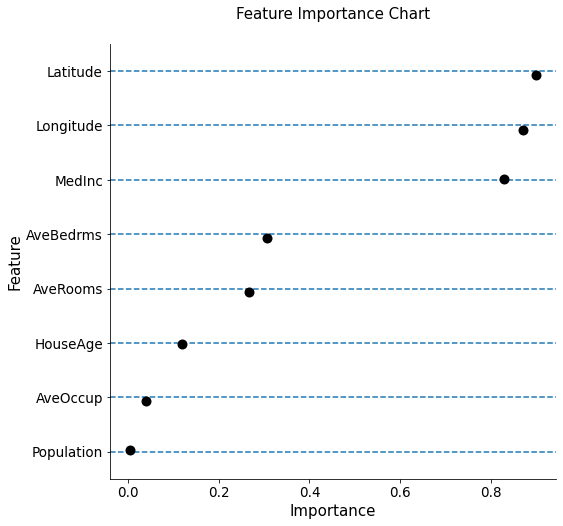

In [3]:
imp_ols = feat.ols_imp(X,Y)
I_ols = feat.create_featimp_df(X,imp_ols)
feat.plot_featimp(I_ols)

<div style=style="font-size: 18px">
<p style="font-family:times new roman">
 As per the coefficients, we see that Latitude and Longitude are the most important to Median House value, followed by other features. But OLS feature importance has some drawbacks - If there are multicollinear features in the data, coefficients can get large and unstable. Here, Latitude and Longitude are highly correlated and both are given high importance by the OLS estimates, which doesn't feel right.  Also, OLS assumes that features have a linear relationship with the target. That means features can be highly predictive and important and still have low feature importance scores if they don’t have a linear relationship with the target. 
    </p></div>

<div style="font-family:times new roman"> 
 <h1 style="font-size:t 20px"> 
    2.2  Principal Component Analysis (PCA)
    </h1></div>
<br>
<div style=style="font-size: 18px">
<p style="font-family:times new roman">
PCA transforms data into a new space characterized by eigenvectors and identifies features that explain the most variance in the new space. We take the first principal component that covers a large percentage of the variance, the weight associated with that component can indicate importance of features in the original X space.
    </p></div>

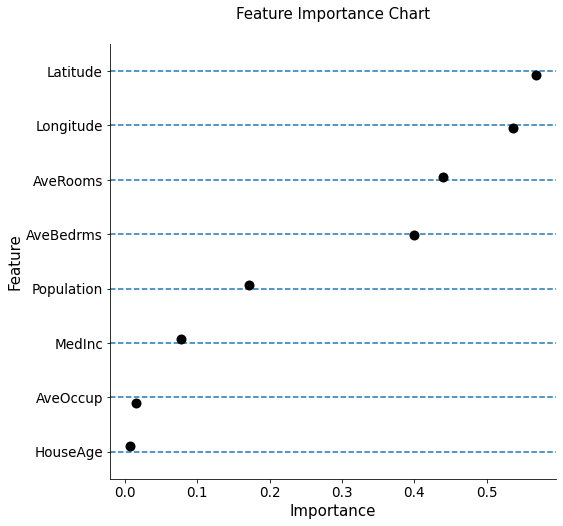

In [4]:
imp_pca = feat.pca_imp(X)
I_pca = feat.create_featimp_df(X,imp_pca)
feat.plot_featimp(I_pca)

<div style="font-family:times new roman"> 
 <h1 style="font-size:t 20px"> 
    2.3  Minimal-Redundancy-Maximal-Relevance (mRMR) using Spearman's Rank Coefficient
    </h1></div>
<br>
<div style=style="font-size: 18px">
<p style="font-family:times new roman">
OLS and other techniques suffer from codependency problems where correlated features might share the same feature importance score. In an effort to deal with this, we can rank features not just by their correlation with the target (called relevance) but also by calculating how redundant they are with other features. This technique is known as Minimal-Redundancy-Maximal-Relevance (mRMR).
    </p></div>

\begin{aligned}J_{mRMR}\left( x_{k}\right) = I\left( x_{k},y\right) -\dfrac{1}{\left| S\right| } \sum\limits_{x_{j}\in S} I\left( x_{k},x_{j}\right) \end{aligned}

<div style="font-family:times new roman"> 
 <h1 style="font-size:20px"> 
  Algorithm
    </h1></div>
<br>
<div style=style="font-size: 18px">
<p style="font-family:times new roman">
1. Since the selected feature set, <i>'S'</i>,  is empty in the first iteration, select the feature having the highest Spearman’s rank coefficient with the target.<br>
2. Get the score by computing the difference between relevance (Spearman’s rank coefficient of X<sub>k</sub> with the target) <br> \begin{aligned} I\left( x_{k},y\right)\end{aligned} <br> and redundancy (summation of Spearman’s rank coefficients of X<sub>k</sub> with X<sub>j</sub> and divide this by length of selected feature set size where Xj is the feature in selected feature set) <br> \begin{aligned} \dfrac{1}{\left| S\right| }  \sum\limits_{x_{j}\in S} I\left( x_{k},x_{j}\right) \end{aligned}
3. Select the next most important feature based on the max score by exhaustively checking for all the unranked features in the current iteration. Add this feature to selected set <i>'S'</i>. <br>
4. Repeat steps 2-3 until all the features have been ranked.
   
</p></div>

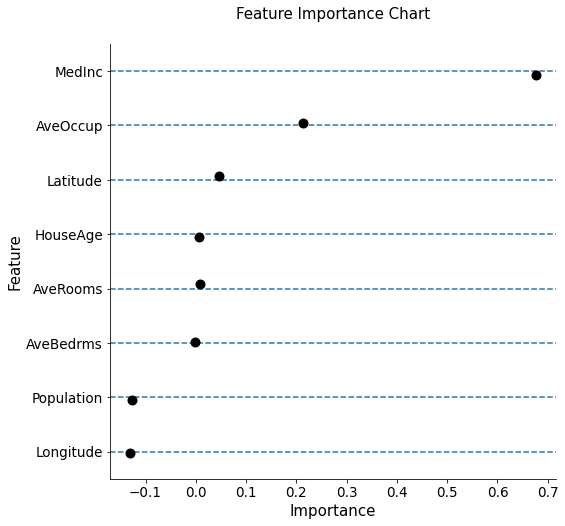

In [5]:
I_mrmr = feat.mrmr_spearman(X,Y)
feat.plot_featimp(I_mrmr)

<div style=style="font-size: 18px">
<p style="font-family:times new roman">
As we can see from the above plot, Latitude and Longitude no longer share the same importance anymore. mRMR is a very useful feature importance technique where there is a presence of codependent features in the dataset.
        </p></div>

<div style="font-family:times new roman"> 
 <h1 style="font-size:t 20px"> 
2.4  Drop Column importance
</h1></div>
<br>
<div style=style="font-size: 18px">
<p style="font-family:times new roman">
It is brute force mechanism to examine importance of any feature or combination of features with respect to a model. <br> <br>
<div style="font-family:times new roman"> 
 <h1 style="font-size:t 20px"> 
Algorithm
     </h1></div>     
<br>
<div style=style="font-size: 18px">
<p style="font-family:times new roman">
1. Compute the baseline validation score by fitting the model on all the features. <br>
2. Drop column X<sub>j</sub> from the training set and retrain the model. <br>
3. Compute validation score using the trained model from the previous step. <br>
4. Importance score is the difference between baseline score and validation score from step 3. <br>
5. Repeat steps 2-4 for all the features<br>


</p></div>

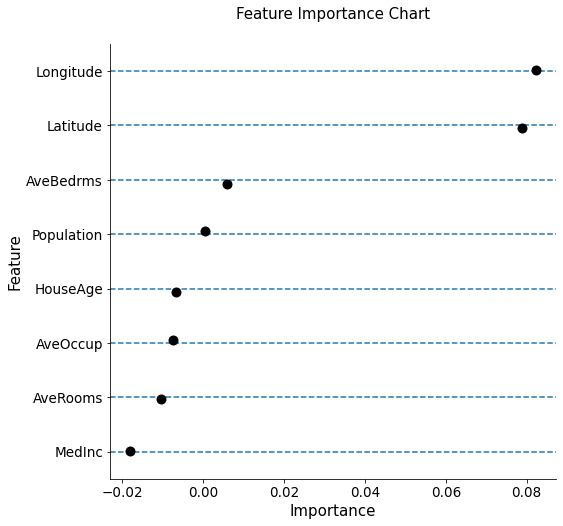

In [6]:
model = RandomForestRegressor(n_estimators=30, n_jobs = -1)
baseline_score, imp_drop  = feat.dropcol_imp(model, x_train, y_train, x_val, y_val)
I_drop = feat.create_featimp_df(X, imp_drop)
feat.plot_featimp(I_drop)

<div style=style="font-size: 18px">
<p style="font-family:times new roman">
We have used the random forest model in this case but any model can be used for computing drop column feature importance. This technique can be computationally intensive as we are fitting <i>'p'</i> models.

<div style="font-family:times new roman"> 
 <h1 style="font-size:t 20px"> 
2.5  Permutation Column importance
</h1></div>
<br>
<div style=style="font-size: 18px">
<p style="font-family:times new roman">
This technique is similar to the drop column, but instead of dropping the column X<sub>j</sub>, we maintain the distribution of the feature and only permute its values.
<div style="font-family:times new roman"> 
 <h1 style="font-size:t 20px"> 
Algorithm
     </h1></div>     
<br>
<div style=style="font-size: 18px">
<p style="font-family:times new roman">
1. Compute the baseline validation score by fitting the model on all the features. <br>
2. Save the original order of values of Xj in a variable and permute column X<sub>j</sub> in the validation set. <br>
3. Compute the validation score and save Xj with the original order of values.  <br>
4. Importance score is the difference between baseline score and validation score from step 3. <br>
5. Repeat steps 2-4 for all the features<br>


</p></div>

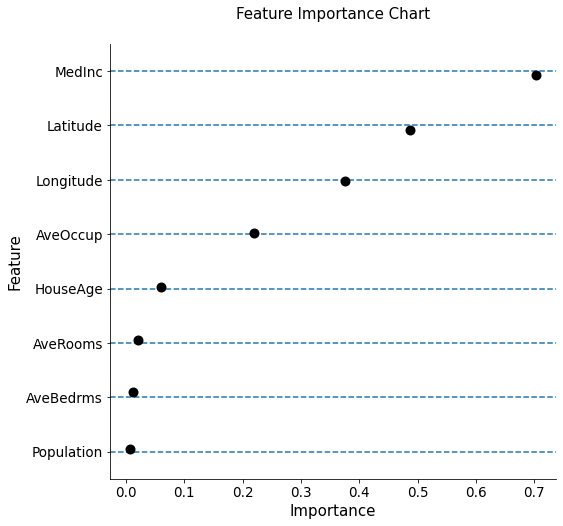

In [7]:
baseline_score, imp_permu  = feat.permutation_imp(model, x_train, y_train, x_val, y_val)
I_permu = feat.create_featimp_df(X, imp_permu)
feat.plot_featimp(I_permu)

<div style=style="font-size: 18px">
<p style="font-family:times new roman">
This technique is more computationally efficient than the drop column as we don't need to retrain the model every time. As can be seen from the plot, codependent features can share importance, such as longitude and latitude.

<div style="font-family:times new roman"> 
 <h1 style="font-size:t 20px"> 
3.0  Comparing Feature importance techniques
</h1></div>

<div style=style="font-size: 18px">
<p style="font-family:times new roman">
Now that we discussed some feature importance techniques to get feature ranking, in this section we would train OLS, Random Forest, and XGBoost models on the top k=1...p features to see how good those features are. 

<div style="font-family:times new roman"> 
 <h1 style="font-size:t 20px"> 
3.1  OLS model
</h1></div>

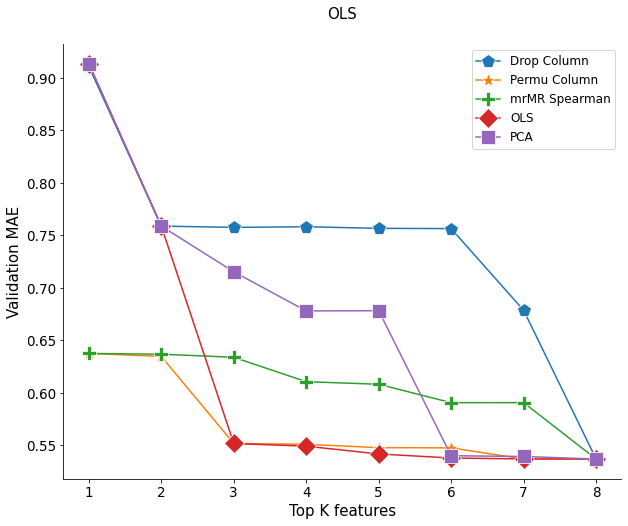

In [8]:
df_ols = feat.compare_feat_ranking(I_drop, I_permu, I_mrmr, I_ols, I_pca, LinearRegression())
feat.plot_compare_strategies(df_ols, "OLS")

<div style="font-family:times new roman"> 
 <h1 style="font-size:t 20px"> 
3.2  Random Forest model
</h1></div>

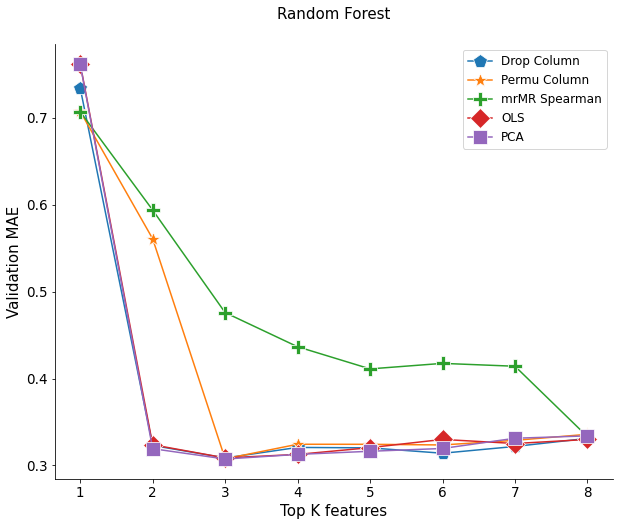

In [10]:
df_rf=feat.compare_feat_ranking(I_drop, I_permu, I_mrmr, I_ols, I_pca, RandomForestRegressor(n_estimators=30, n_jobs=-1))
feat.plot_compare_strategies(df_rf, "Random Forest")

<div style="font-family:times new roman"> 
 <h1 style="font-size:t 20px"> 
3.3  XGBoost model
</h1></div>

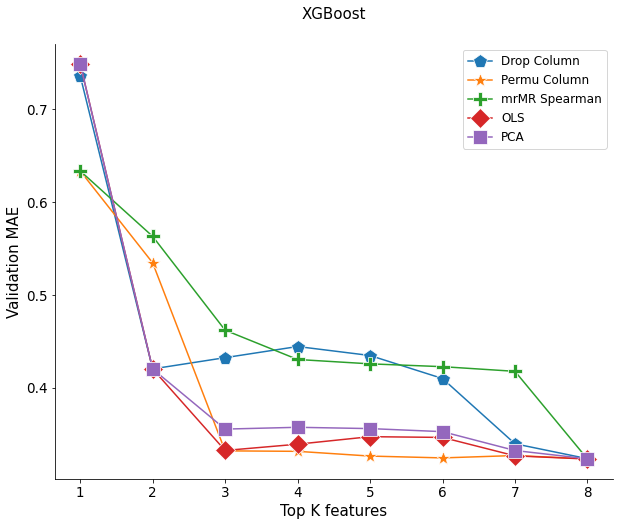

In [9]:
df_xgb = feat.compare_feat_ranking(I_drop, I_permu, I_mrmr, I_ols, I_pca, xgb.XGBRegressor(n_estimators=30, n_jobs=-1))
feat.plot_compare_strategies(df_xgb, "XGBoost")

<div style="font-family:times new roman"> 
 <h1 style="font-size:t 20px"> 
4.0  Automatic Feature Selection
</h1></div>

<div style=style="font-size: 18px">
<p style="font-family:times new roman">
Once we have the ranking of features through certain criteria, we need an automated method that would drop the unimportant features and give us the list of most important features. The following algorithm will keep the top k features, for some k we don't know beforehand.

<div style="font-family:times new roman"> 
 <h1 style="font-size:t 20px"> 
Algorithm
</h1></div>
<br>
<div style=style="font-size: 18px">
<p style="font-family:times new roman">
Choose a baseline validation metric for the model. In this example, we have chosen Mean absolute error. Based on certain criteria, get the ranked feature importances. In this example, we have chosen PCA as our criterion. 
    </p></div><br>
<br>
<div style=style="font-size: 18px">
    <div style="font-family:times new roman">
1. Fit a model using all the features and get the baseline validation metric and compute the feature importance        using the selected criterion. <br>
2. Retrain the model without the feature having the lowest importance. Compute the validation metric and check if it's better than the previously calculated metric. If no, stop. Else, drop this feature and re-compute the feature importances.<br>
3. Repeat step 2 for all the features. We will get the list of the most important features for our model.
    </div>
</div>

In [13]:
selected_features, errors = feat.automatic_feature_selection(x_train, y_train, x_val, y_val)
s = pd.DataFrame(errors, columns=['Validation MAE'])

In [32]:
for i in selected_features:
    print(i)

AveBedrms
AveRooms
Latitude
Longitude


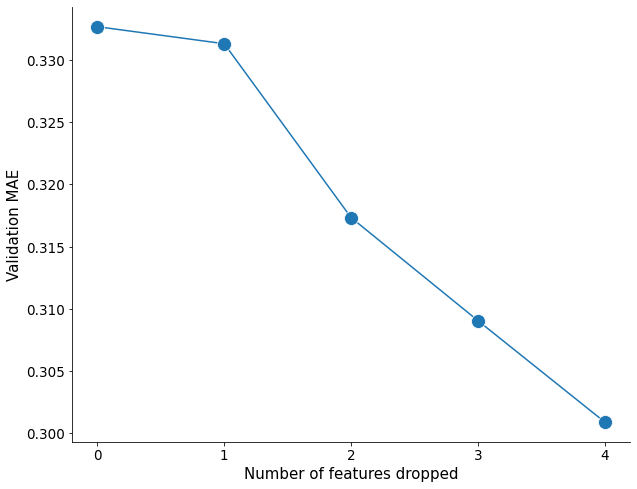

In [35]:
feat.plot_automatic_feat_selection(s)

<div style=style="font-size: 18px">
<p style="font-family:times new roman">
We see that out of the 8 features, 4 unimportant features have been dropped, and therefore gives the best validation MAE.    </p></div>

<div style="font-family:times new roman"> 
 <h1 style="font-size:t 20px"> 
Conclusion</h1></div>
<br>
<div style=style="font-size: 18px">
<p style="font-family:times new roman">
In this report we introduced the topic of feature selection and importance. We also discussed the importance of feature selection in machine learning life cycle. We implemented feature importance techniques from scratch like OLS, mRMR using Spearman's Rank Coefficient, Principal Component Analysis, Drop Column, Permutation  and also discussed  their advantages and disadvantages. Data Vizualization techniques helped us in comparing different feature importance techniques by fitting several models like Random Forest, Linear Regression, Xtreme Gradient Boosting to analyze how validation metric change. Finally, we implemented automated feature selection method to select the most important features from our dataset. 